<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Image Interpolation </H1>

<H3> INF-285 Computación Científica </H3>
<H3> Autor: Francisco Andrades</H3>

Lenguaje: Python

Temas:

    - Image Interpolation 
    - Interpolación Bicúbica
    - Lagrange, Newton, Spline
<hr style="height:2px;border:none"/>

In [1]:
import numpy as np
import sympy as sp
from PIL import Image
from scipy import interpolate
import matplotlib.pyplot as plt

## Introducción

En la siguiente tarea estudiaremos un método de interpolación denominado **Interpolación Bicúbica**, utilizada frecuentemente sobre imágenes. Aplicaremos el método para aumentar la resolución de una imagen intentando preservar las propiedades de la versión original.

## Contexto

Supongamos que usted conoce $f$ y las derivadas $f_x$, $f_y$ y $f_{xy}$ dentro de las coordenadas $(0,0),(0,1),(1,0)$ y $(1,1)$ de un cuadrado unitario. La superficie que interpola estos 4 puntos es:

$$
p(x,y) = \sum\limits_{i=0}^3 \sum_{j=0}^3 a_{ij} x^i y^j.
$$

Como se puede observar el problema de interpolación se resume en determinar los 16 coeficientes $a_{ij}$ y para esto se genera un total de $16$ ecuaciones utilizando los valores conocidos de $f$,$f_x$,$f_y$ y $f_{xy}$. Por ejemplo, las primeras $4$ ecuaciones son:

$$
\begin{aligned}
f(0,0)&=p(0,0)=a_{00},\\
f(1,0)&=p(1,0)=a_{00}+a_{10}+a_{20}+a_{30},\\
f(0,1)&=p(0,1)=a_{00}+a_{01}+a_{02}+a_{03},\\
f(1,1)&=p(1,1)=\textstyle \sum \limits _{i=0}^{3}\sum \limits _{j=0}^{3}a_{ij}.
\end{aligned}
$$

Para las $12$ ecuaciones restantes se debe utilizar:

$$
\begin{aligned}
f_{x}(x,y)&=p_{x}(x,y)=\textstyle \sum \limits _{i=1}^{3}\sum \limits _{j=0}^{3}a_{ij}ix^{i-1}y^{j},\\
f_{y}(x,y)&=p_{y}(x,y)=\textstyle \sum \limits _{i=0}^{3}\sum \limits _{j=1}^{3}a_{ij}x^{i}jy^{j-1},\\
f_{xy}(x,y)&=p_{xy}(x,y)=\textstyle \sum \limits _{i=1}^{3}\sum \limits _{j=1}^{3}a_{ij}ix^{i-1}jy^{j-1}.
\end{aligned}
$$


Una vez planteadas las ecuaciones, los coeficientes se pueden obtener al resolver el problema $A\alpha=x$, donde $\alpha=\left[\begin{smallmatrix}a_{00}&a_{10}&a_{20}&a_{30}&a_{01}&a_{11}&a_{21}&a_{31}&a_{02}&a_{12}&a_{22}&a_{32}&a_{03}&a_{13}&a_{23}&a_{33}\end{smallmatrix}\right]^T$ y ${\displaystyle x=\left[{\begin{smallmatrix}f(0,0)&f(1,0)&f(0,1)&f(1,1)&f_{x}(0,0)&f_{x}(1,0)&f_{x}(0,1)&f_{x}(1,1)&f_{y}(0,0)&f_{y}(1,0)&f_{y}(0,1)&f_{y}(1,1)&f_{xy}(0,0)&f_{xy}(1,0)&f_{xy}(0,1)&f_{xy}(1,1)\end{smallmatrix}}\right]^{T}}$.


En un contexto más aplicado, podemos hacer uso de la interpolación bicúbica para aumentar la resolución de una imagen. Supongamos que tenemos la siguiente imagen de tamaño $5 \times 5$:

<img src="assets/img1.png" width="20%"/>

Podemos ir tomando segmentos de la imagen de tamaño $2 \times 2$ de la siguiente forma:

<img src="assets/img2.png" width="50%"/>

Por cada segmento podemos generar una superficie interpoladora mediante el algoritmo de interpolación cubica. Para el ejemplo anterior estariamos generando $16$ superficies interpoladoras distintas. La idea es hacer uso de estas superficies para estimar los valores de los pixeles correspondienets a una imagen más grande. Por ejemplo, la imagen $5 \times 5$ la podemos convertir a una imagen de $9 \times 9$ agregando un pixel entre cada par de pixeles originales además de uno en el centro para que no quede un hueco.

<img src="assets/img3.png" width="50%"/>

Aca los pixeles verdes son los mismos que la imagen original y los azules son obtenidos de evaluar cada superficie interpoladora. Notar que existen pixeles azules que se pueden obtener a partir de dos superficies interpoladoras distintas, en esos casos se puede promediar el valor de los pixeles o simplemente dejar uno de los dos. 

Para trabajar con la interpolación bicubica necesitamos conocer los valores de $f_x$, $f_y$ y $f_{xy}$. En el caso de las imagenes solo tenemos acceso al valor de cada pixel por lo que deberemos estimar cual es el valor de estos. Para estimar $f_x$ haremos lo siguiente:

Para estimar el valor de $f_x$ en cada pixel haremos una interpolación con los algoritmos conocidos, usando tres pixels en dirección de las filas, luego derivaremos el polinomio obtenido y finalmente evaluaremos en la posición de interes. La misma idea aplica para $f_y$ solo que ahora interpolaremos en dirección de las columnas.

<img src="assets/img5.png" width="60%"/>

Por ejemplo si queremos obtener el valor de $f_x$ en la posición $(0,0)$ (imagen de la izquierda) entonces haremos una interpolación de Lagrange utilizando los pixeles $(0,0),(0,1)$ y $(0,2)$. Derivaremos el polinomio interpolador y evaluaremos en $(0,0)$. Por otro lado si queremos obtener el valor de $f_y$ en la posición $(0,0)$ (imagen de la derecha) entonces interpolaremos los pixeles $(0,0),(1,0)$ y $(2,0)$. Luego derivaremos el polinomio interpolador y evaluaremos en $(0,0)$.

Para obtener $f_{xy}$ seguiremos la idea anterior. Solo que esta vez se utilizaran los valores de $f_y$ y se interpolaran estos en dirección de las filas.

# Preguntas

## 1. Interpolación bicubica

### 1.1  Obtener derivadas (30 puntos)

Implemente la función `derivativeValues` que reciba como input un arreglo con valores, el método de interpolación y si es que se considera el uso de  los puntos de chebyshev . La función debe retornar un arreglo de igual dimensión con los valores de las derivadas de los puntos obtenidas

Los métodos de interpolación serán representados por los siguientes valores

* Interpolación de lagrange: `'lagrange'`
* Diferencias divididas de Newton: `'newton'`
* Spline cubica: `'spline3'`


In [2]:
def chebyshevNodes(n):
    i = np.arange(1, n+1)
    t = (2*i - 1) * np.pi / (2 * n)
    return np.cos(t)

def newtonDD(x_i, y_i):
    n = x_i.shape[-1]
    pyramid = np.zeros((n, n)) # Create a square matrix to hold pyramid
    pyramid[:,0] = y_i # first column is y
    for j in range(1,n):
        for i in range(n-j):
            # create pyramid by updating other columns
            pyramid[i][j] = (pyramid[i+1][j-1] - pyramid[i][j-1]) / (x_i[i+j] - x_i[i])
    a = pyramid[0] # f[ ... ] coefficients
    N = lambda x: a[0] + np.dot(a[1:], np.array([np.prod(x - x_i[:i]) for i in range(1, n)]))
    return N

def calcular(values1,values2,values3, method, cheb,number):
    y = np.array((values1,values2,values3))
    x = np.array((0,1,2))
    if cheb:
        x = chebyshevNodes(3)
        x.sort()
    xS = sp.symbols('x', reals=True)
    if(method == 'lagrange'):
        L = interpolate.lagrange(x,y)
        deriv = np.polyder(L)
        return deriv(x[number])
    if(method == 'newton'):
        Pn = newtonDD(x, y)
        L = Pn(xS)
        deriv = sp.diff(L,xS)
    if(method=='spline3'):
        deriv = interpolate.CubicSpline(x, y)
        deriv = deriv.derivative()
        return deriv(x[number])
    return deriv.evalf(subs = {xS : x[number]})

calcular_v = np.vectorize(calcular)


#recibe fila de 1 dimension
def derivativeValues(fila,method,cheb):
    """
    Parameters
    ----------
    values:	(int array) points values
    method:	(string)	interpolation method
    cheb:	(boolean)	if chebyshev points are used

    Returns
    -------
    d:	(float array) derivative value of interpolated points

    """
    shape = fila.shape
    nuevo = np.zeros(shape)
    nuevo[1:shape[0]-1] = calcular_v(fila[0:shape[0]-2],fila[1:shape[0]-1],fila[2:shape[0]],method,cheb,1)
    nuevo[0] = calcular_v(fila[0],fila[1],fila[2], method, cheb,0)
    nuevo[shape[0]-1] = calcular_v(fila[shape[0]-3],fila[shape[0]-2],fila[shape[0]-1], method, cheb,2)
    return nuevo


### 1.2 Interpolación de imagen (50 puntos)
Implemente la función `bicubicInterpolation` que reciba como input la matriz de la imagen y cuantos píxeles extra se quiere agregar entre los píxeles originales y el algoritmo de interpolación a utilizar. La función debe retornar la matriz con la imagen de dimensión nueva. Considere que se debe aplicar el método de interpolación en cada canal RGB por separado.

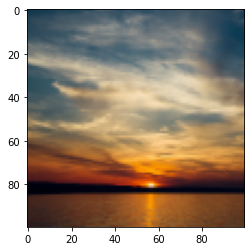

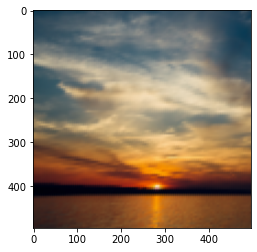

In [8]:
def obtain_all_derivatives(image,method,cheb):
        shape = image.shape
        nuevo_x = np.zeros(shape)
        nuevo_y = np.zeros(shape)
        nuevo_xy = np.zeros(shape)
        for i in range(shape[2]):
            nuevo_y[:,:,i] = np.array([derivativeValues(n, method, cheb) for n in image[:,:,i].T]).T
            nuevo_x[:,:,i] = np.array([derivativeValues(n, method, cheb) for n in image[:,:,i]])
            nuevo_xy[:,:,i] = np.array([derivativeValues(n, method, cheb) for n in nuevo_y[:,:,i]])
        
        return nuevo_x,nuevo_y,nuevo_xy



def bicubicInterpolation(image, interiorPixels, method,cheb):
    """
    Parameters
    ----------
    image:	(nxnx3 array) image array in RGB format
    interiorPixels:	(int)	interpolation method
    method:	(string)	interpolation method
    cheb:	(boolean)	if chebyshev points are used


    Returns
    -------
    newImage:	(nxnx3 array) image array in RGB format

    """
    matriz = np.array(((1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),(0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0),(-3,3,0,0,-2,-1,0,0,0,0,0,0,0,0,0,0),(2,-2,0,0,1,1,0,0,0,0,0,0,0,0,0,0),
                      (0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0),(0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0),(0,0,0,0,0,0,0,0,-3,3,0,0,-2,-1,0,0),
                      (0,0,0,0,0,0,0,0,2,-2,0,0,1,1,0,0),(-3,0,3,0,0,0,0,0,-2,0,-1,0,0,0,0,0),(0,0,0,0,-3,0,3,0,0,0,0,0,-2,0,-1,0),
                      (9,-9,-9,9,6,3,-6,-3,6,-6,3,-3,4,2,2,1),(-6,6,6,-6,-3,-3,3,3,-4,4,-2,2,-2,-2,-1,-1),(2,0,-2,0,0,0,0,0,1,0,1,0,0,0,0,0),
                      (0,0,0,0,2,0,-2,0,0,0,0,0,1,0,1,0),(-6,6,6,-6,-4,-2,4,2,-3,3,-3,3,-2,-1,-2,-1),(4,-4,-4,4,2,2,-2,-2,2,-2,2,-2,1,1,1,1)))
    
    
    shape = image.shape
    nueva_imagen = np.zeros((shape[0]*(interiorPixels+1)-interiorPixels,shape[1]*(interiorPixels+1)-interiorPixels,shape[2]),dtype=image.dtype)
    nuevo_x, nuevo_y, nuevo_xy = obtain_all_derivatives(image,method,cheb)
    
    
    for j in range(shape[0]-1):
        for i in range(shape[0]-1):
            for rgb in range(shape[2]):
                array = np.array((image[i,j,rgb],image[i+1,j,rgb],image[i,j+1,rgb]
                                  ,image[i+1,j+1,rgb],nuevo_x[i,j,rgb],nuevo_x[i+1,j,rgb]
                                  ,nuevo_x[i,j+1,rgb],nuevo_x[i+1,j+1,rgb],nuevo_y[i,j,rgb]
                                  ,nuevo_y[i+1,j,rgb],nuevo_y[i,j+1,rgb],nuevo_y[i+1,j+1,rgb]
                                  ,nuevo_xy[i,j,rgb],nuevo_xy[i+1,j,rgb],nuevo_xy[i,j+1,rgb],nuevo_xy[i+1,j+1,rgb]))
                a = matriz.dot(array.T)
                P = lambda x,y: np.sum([a[i]*(x**(i%4))*y**(int(i/4)) for i in range(16)])
                
                numero_fila = (interiorPixels + 1)*i
                numero_columna = (interiorPixels+1)*j
                
                #rellenar
                for cont in range(interiorPixels+2):
                    for cont1 in range(interiorPixels+2):
                        value = P(cont1/(interiorPixels+1),cont/(interiorPixels+1))
                        if(value > 255):
                            value = 255
                        if(value < 0):
                            value = 0
                        if(nueva_imagen[numero_fila+cont1,numero_columna+cont,rgb] != 0):
                            value = (nueva_imagen[numero_fila+cont1,numero_columna+cont,rgb]+value)/2
                        nueva_imagen[numero_fila+cont1,numero_columna+cont,rgb] = value

    
    return nueva_imagen

img = Image.open('sunset.png')
img = img.convert('RGB')
array=np.array(img)
array_nuevo = bicubicInterpolation(array, 4, 'spline3',False)
#original
plt.imshow(img)
plt.show()
#interpolada
plt.imshow(array_nuevo)
plt.show()

In [10]:
print("Tamaño Original: ",array.shape)
print("Interpolada: ", array_nuevo.shape)

Tamaño Original:  (100, 100, 3)
Interpolada:  (496, 496, 3)


## 2. Evaluacion de algoritmos



### 2.1 Tiempo de ejecucion 
Implemente la funcion `timeInterpolation` que mida el tiempo de interpolacion de una imagen dado el algoritmo de interpolacion , en segundos.(5 puntos)

In [25]:
import time
def timeInterpolation(image, interiorPixels, method,cheb):
    """
    Parameters
    ----------
    image:	(nxnx3 array) image array in RGB format
    interiorPixels:	(int)	interpolation method
    method:	(string)	interpolation method
    cheb:	(boolean)	if chebyshev points are used


    Returns
    -------
    time:	(float) time in seconds

    """
    time1 = time.time()
    bicubicInterpolation(image, interiorPixels, method,cheb)
    time2 = time.time()
    return time2-time1

***Pregunta: ¿Cual es el metodo que presenta mayor velocidad en general? (5 puntos)***

'spline3' es el método con mayor velocidad

### 2.2 Calculo de error
Implemente la funcion `errorInterpolation` la cual debe obtener el error de la imagen obtenida comparandola con una de referencia. El error debe ser calculado utilizando el indice SSIM (Structural similarity) (5 puntos)

In [27]:
from skimage import metrics
def errorInterpolation(original,new):
    """
    Parameters
    ----------
    image:	(nxn array) original image array in RGB format
    new:	(nxn array) new image array in RGB format obtained from interpolation


    Returns
    -------
    error:	(float) difference between images 

    """
    
    s = metrics.structural_similarity(original, new, multichannel = True) 
    return 1-s

***Pregunta: ¿Cual metodo presenta menor error? (5 puntos)***

Depende. 
Para gradient con 1 pixel, 'lagrange'.
Para gradient con 4 pixel, 'spline3'.
Para sunset con 1 pixel, 'lagrange'.
Para sunset con 2 pixel, 'lagrange'.

Cabe destacar que los errores son muy parecidos, con una diferencia entre 10^-5 y 10^-6.

Referencias:
chebyshevNodes(), NewtonDD() sacados del jupiter del curso.